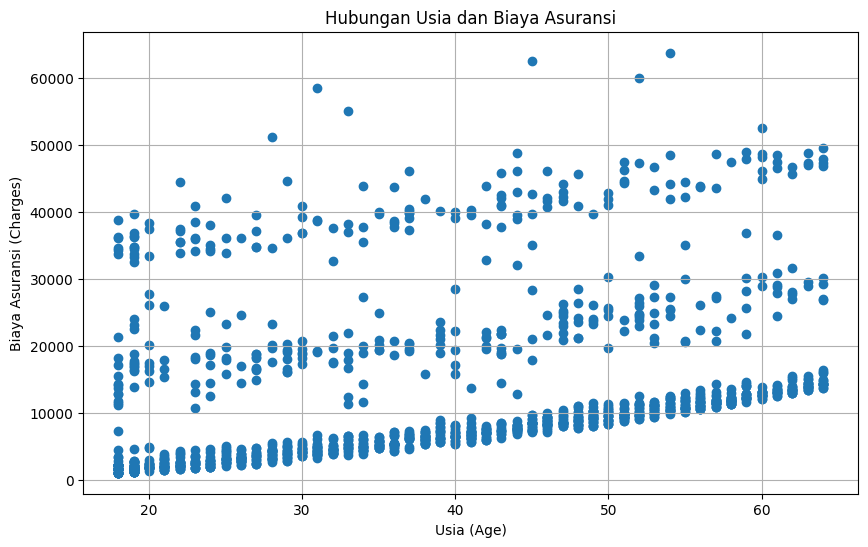

R-squared: 0.12408973539501944


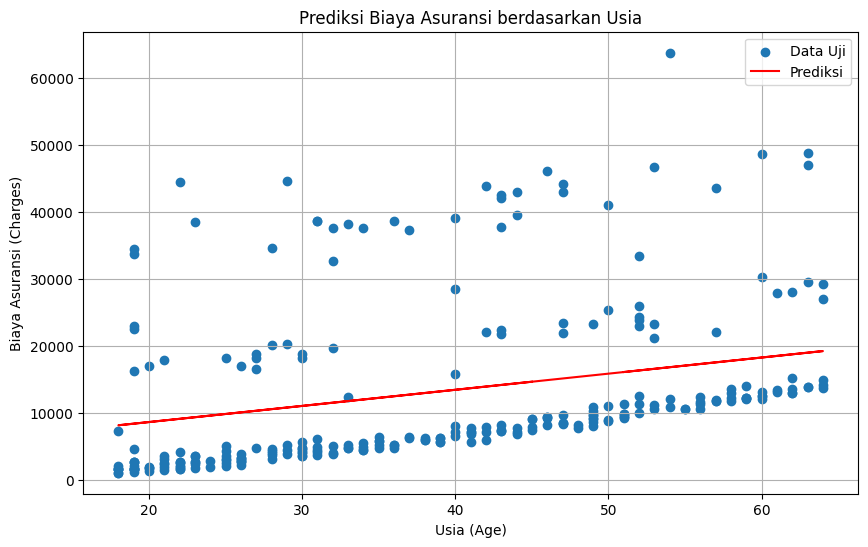

Prediksi biaya asuransi untuk usia 40: 13500.791075742687


In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')

plt.figure(figsize=(10, 6))
plt.scatter(
    df['age'], 
    df['charges']
)
plt.xlabel('Usia (Age)')
plt.ylabel('Biaya Asuransi (Charges)')
plt.title('Hubungan Usia dan Biaya Asuransi')
plt.grid(True)
plt.show()

X = df[['age']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Data Uji')
plt.plot(X_test, y_pred, color='red', label='Prediksi')
plt.xlabel('Usia (Age)')
plt.ylabel('Biaya Asuransi (Charges)')
plt.title('Prediksi Biaya Asuransi berdasarkan Usia')
plt.legend()
plt.grid(True)
plt.show()

new_age_level = pd.DataFrame({
    'age': [40]
})
predicted_charges = model.predict(new_age_level)
print(f"Prediksi biaya asuransi untuk usia 40: {predicted_charges[0]}")